In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow import keras
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset (replace 'data.csv' with your dataset)
data = pd.read_csv('Vehicle_Insurance_Dataset.csv')

In [3]:
print(data.head)
print(data.tail)
print(data.describe)

<bound method NDFrame.head of       Vehicle_policy_id  Vehicle_policy_tenure  Vehicle_period  \
0               ID58593               0.341732            0.00   
1               ID58594               0.307241            0.13   
2               ID58595               0.327924            0.12   
3               ID58596               0.782654            0.01   
4               ID58597               1.233404            0.02   
...                 ...                    ...             ...   
39058           ID97651               0.047982            0.15   
39059           ID97652               1.224838            0.05   
39060           ID97653               0.520287            0.12   
39061           ID97654               1.172391            0.08   
39062           ID97655               0.094030            0.12   

       period_of_vehicle_policyholder Vehicle_area_cluster  \
0                            0.586538                   C3   
1                            0.442308                

In [8]:
data['Target'] = (data['Vehicle_policy_tenure'].shift(-1) > data['Vehicle_policy_tenure']).astype(int)

In [9]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [10]:
# Gathering the Information
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Vehicle_policy_tenure', 'period_of_vehicle_policyholder', 'population_density', 'Vehicle_displacement']])
print(scaled_data)

[[-0.64957317  0.96215781 -0.83505944 -1.36587528]
 [-0.73268227 -0.21937919 -0.56777665  0.13633869]
 [-0.68284527 -0.14061005 -0.56777665 -0.60540287]
 ...
 [-0.21931798 -0.92830138 -0.32661031  0.13633869]
 [ 1.35201798  1.43477261  0.90199543  0.13633869]
 [-1.2464447  -1.32214704 -0.56777665  1.24520486]]


In [11]:
# Create features and target variable
X = scaled_data[:, :-1]
y = data['Target'].values

In [12]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print(log_reg_accuracy)

0.7527198259311404


In [15]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(dt_accuracy)

0.669525150390375


In [16]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(rf_accuracy)

0.7003711762447203


In [17]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(knn_accuracy)

0.7195699475233585


In [18]:
# ARIMA Model
# Assuming you have time series data for ARIMA
# Splitting data for ARIMA
train_data = data[:int(0.8*(len(data)))]
test_data = data[int(0.8*(len(data))):]

In [19]:
# LSTM Model
# Assuming you have sequential data for LSTM
# Reshape the data
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [20]:
# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=1))

In [21]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32)

Epoch 1/100
977/977 [==============================] - 7s 7ms/step - loss: 0.1654
Epoch 2/100
977/977 [==============================] - 6s 6ms/step - loss: 0.1654
Epoch 3/100
977/977 [==============================] - 7s 7ms/step - loss: 0.1652
Epoch 4/100
977/977 [==============================] - 6s 6ms/step - loss: 0.1653
Epoch 5/100
977/977 [==============================] - 7s 7ms/step - loss: 0.1654
Epoch 6/100
977/977 [==============================] - 6s 6ms/step - loss: 0.1652
Epoch 7/100
977/977 [==============================] - 7s 7ms/step - loss: 0.1652
Epoch 8/100
977/977 [==============================] - 6s 6ms/step - loss: 0.1652
Epoch 9/100
977/977 [==============================] - 7s 7ms/step - loss: 0.1652
Epoch 10/100
977/977 [==============================] - 6s 6ms/step - loss: 0.1651
Epoch 11/100
977/977 [==============================] - 7s 7ms/step - loss: 0.1653
Epoch 12/100
977/977 [==============================] - 6s 6ms/step - loss: 0.1652
Epoch 13/100


In [24]:
# Predictions
lstm_predictions = lstm_model.predict(X_test_lstm)

245/245 [==============================] - 1s 2ms/step


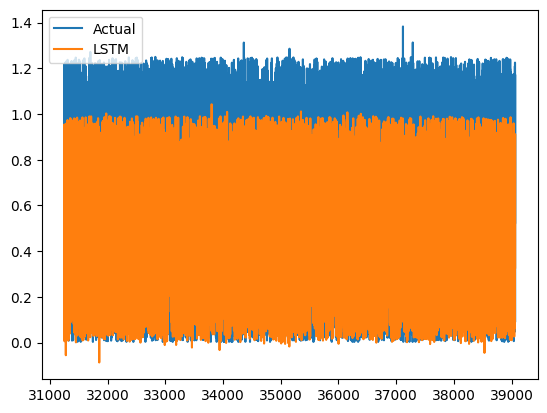

In [26]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Vehicle_policy_tenure'], label='Actual')
plt.plot(test_data.index, lstm_predictions, label='LSTM')
plt.legend()
plt.show()

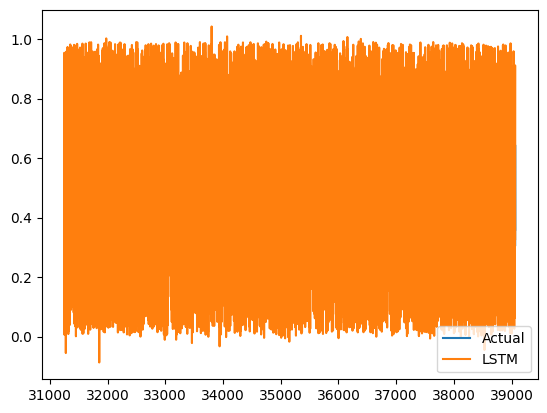

In [28]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['period_of_vehicle_policyholder'], label='Actual')
plt.plot(test_data.index, lstm_predictions, label='LSTM')
plt.legend()
plt.show()

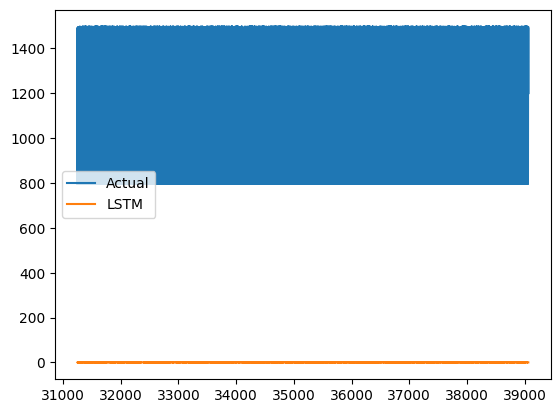

In [29]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Vehicle_displacement'], label='Actual')
plt.plot(test_data.index, lstm_predictions, label='LSTM')
plt.legend()
plt.show()